# Определение языка и VK API

В данном задании вам нужно будет:

* используя API Вконтакте, скачать комментарии к первым ста постам из пяти сообществ
* натренировать модель распознавания языков на статьях из Википедии.
* распознать язык всех комментариев, где в тексте есть 10 и более символов, и построить статистику

## VK API

Для подключения к ВКонтакте мы будем использовать VK API. Здесь есть документация к этой библиотеке https://vk-api.readthedocs.io/en/latest/

In [0]:
#!pip3 install vk_api

  Created wheel for vk-api: filename=vk_api-11.5.0-cp36-none-any.whl size=40928 sha256=7f499243d96f021c80e916a35f95bf239edd0aa85af0d7380bb7386e7209e580
  Stored in directory: /root/.cache/pip/wheels/a8/6a/53/d90ca4ed187200fa58336eeb057f5c75e4febe83f47538a1e2
Successfully built vk-api


In [0]:
import vk_api

# здесь нужно ввести данные своего аккаунта
# когда будете сдавать, не забудьте убрать эти две строчки из ноутбука
user = '+79778221851' # вставьте сюда свой номер телефона
password = 'po4emubiinet' # вставьте сюда свой пароль

# авторизация
vk_session = vk_api.VkApi(login=user, password=password)
vk_session.auth()

vk = vk_session.get_api() # объект с API

Получить записи со страницы можно с помощью метода `wall.get`. Он принимает параметр `domain` — короткое имя пользователя или сообщества — и `count` — количество записей, которое вы хотите получить (максимум — 100). По Список методов для работы со стенами: https://vk.com/dev/wall

Например, вот так можно получить последние две записи с вот этой страницы https://vk.com/futureisnow. Выдача представляет собой словарь, в котором в поле `items` записан список словарей, содержащий информацию о каждой из записи. 

In [0]:
vk.wall.get(domain="futureisnow", count=2)

{'count': 8205,
 'items': [{'attachments': [{'photo': {'access_key': 'f355ac34e128abc3cb',
      'album_id': -7,
      'date': 1569676318,
      'id': 457288578,
      'lat': 55.893734,
      'long': 37.416795,
      'owner_id': -111587102,
      'sizes': [{'height': 130,
        'type': 'm',
        'url': 'https://sun1-83.userapi.com/c854228/v854228018/108b9f/gN-udeeZR7k.jpg',
        'width': 73},
       {'height': 231,
        'type': 'o',
        'url': 'https://sun1-28.userapi.com/c854228/v854228018/108ba4/b55ldRs-A1A.jpg',
        'width': 130},
       {'height': 355,
        'type': 'p',
        'url': 'https://sun1-30.userapi.com/c854228/v854228018/108ba5/DOgmvMFBwoo.jpg',
        'width': 200},
       {'height': 568,
        'type': 'q',
        'url': 'https://sun1-87.userapi.com/c854228/v854228018/108ba6/2pkhKcvu-BU.jpg',
        'width': 320},
       {'height': 900,
        'type': 'r',
        'url': 'https://sun1-24.userapi.com/c854228/v854228018/108ba7/uXqATNeThws.jpg',

С помощью метода `groups.getById` можно получить информацию о сообществе, в том числе его id.

In [0]:
vk.groups.getById(group_ids="futureisnow")

[{'id': 111587102,
  'is_admin': 0,
  'is_advertiser': 0,
  'is_closed': 0,
  'is_member': 0,
  'name': 'киберпанк, который мы заслужили',
  'photo_100': 'https://sun1-14.userapi.com/c845124/v845124938/4b878/Lr9NW4jLxOU.jpg?ava=1',
  'photo_200': 'https://sun1-85.userapi.com/c845124/v845124938/4b877/dqfgJ42Ir5E.jpg?ava=1',
  'photo_50': 'https://sun1-29.userapi.com/c845124/v845124938/4b879/-EzOFg-vjTg.jpg?ava=1',
  'screen_name': 'futureisnow',
  'type': 'page'}]

Скачайте информацию о последних ста записях в следующих пабликах: https://vk.com/futureisnow, https://vk.com/eternalclassic, https://vk.com/ukrlit_memes, https://vk.com/ukrainer_net, https://vk.com/amanzohel, https://vk.com/barg_kurumk_culture

In [0]:
# список domain'ов, чтобы вам не копировать их самими :)
publics = ["futureisnow",
           "eternalclassic",
           "ukrlit_memes",
           "ukrainer_net",
           "amanzohel",
           "barg_kurumk_culture"]

In [0]:
items = {} # ключи — это паблики

for public in publics:
    items[public] = vk.wall.get(domain=public, count=100)

Найдите в документации (https://vk.com/dev/wall) метод для получения комментариев и получите первые сто комментариев каждого поста из выборки для каждого паблика.

In [0]:
corpora = {}

for public in publics:
    corpora[public] = {}
    owner_id = items[public]['items'][0]['owner_id']
    for i in range(100):
        post_id = items[public]['items'][i]['id']
        info_comments = vk.wall.getComments(owner_id=owner_id, post_id=post_id,
                                            count=100)
        # проверяем, есть ли вообще комментарии
        if info_comments['count'] > 0:
            # сохраняем только текст комментариев
            corpora[public][post_id] = {}
            cnt = 0
            for j in range(len(info_comments['items'])):
                if 'text' in info_comments['items'][j]:
                    if len(info_comments['items'][j]['text']) >= 10:
                        corpora[public][post_id][cnt] = info_comments['items'][j]['text']
                        cnt += 1

**Задание со звездочкой:** вы могли заметить, что если обращаться к каждому посту отдельно, то все занимает довольно продолжительное время (около пяти минут). Найдите в документации vk_api способ сделать это быстрее.

In [0]:
corpora = {}

# ваш улучшенный код

## Тренировка моделей

В наших комментариях встречались русский, украинский, английский и бурятский.

In [0]:
langs = {'ru', 'uk', 'en', 'bxr'}

Скачайте документы, на которых вы будете обучать свои модели. Для наших целей хорошо иметь для каждого языка корпус размером около 50 статей.

In [0]:
import nltk
nltk.download("punkt")
import wikipedia

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
def get_texts_for_lang(lang, n=10):
    wiki_content = []
    wikipedia.set_lang(lang)
    pages = wikipedia.random(n)
    for page_name in pages:
        try:
            page = wikipedia.page(page_name)
            wiki_content.append("%s\n%s" % (page.title, page.content.replace('=', '')))
        except wikipedia.exceptions.WikipediaException:
            print("Skip %s" % page_name)
    return wiki_content

In [0]:
wiki_texts = {}
for lang in langs:
    wiki_texts[lang] = get_texts_for_lang(lang, 50)
    print(lang, len(wiki_texts[lang]))

bxr 50


/usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Skip Сеттерхольм
Skip Восточная конференция
Skip Льдинка
Skip Зентек
Skip American Eagle (шхуна)
Skip Варенцов, Михаил
ru 44
Skip Isaiah Johnson
Skip Robert Myers
Skip Barma
en 47
Skip Домашня сторінка (значення)
Skip Панькевич
Skip Кукурудзяна вулиця
Skip 1077 (значення)
Skip Голенищев-Кутузов
Skip Межигір'я
Skip 1810 (значення)
uk 43


Сделайте определялку на частотах слов.

In [0]:
from collections import Counter

In [0]:
def collect_freqlist(wiki_pages, max_len=100):
    freqlist = Counter()
    # не забудем про токенизацию - nltk.word_tokenize
    for text in wiki_pages:
        for word in nltk.word_tokenize(text.lower()):
            if word.isalpha():
                freqlist[word] += 1
    return dict(freqlist.most_common(max_len))

In [0]:
freq_lists = {}
for lang in langs:
    freq_lists[lang] = collect_freqlist(wiki_texts[lang])

In [0]:
def simple_lang_detect(freq_lists, text):
    counts = Counter()
    for lang, freq_list in freq_lists.items():
        freq_list = Counter(freq_list)
        for word in nltk.word_tokenize(text):
            counts[lang] += int(freq_list[word] > 0)
    return counts.most_common()

Сделайте определялку на символьных энграммах.

In [0]:
from sklearn import feature_extraction
from sklearn import pipeline
from sklearn import naive_bayes
import numpy as np

In [0]:
clf = pipeline.Pipeline([
    ('vctr', feature_extraction.text.TfidfVectorizer(ngram_range=(1, 2), analyzer='char')),
    ('clf', naive_bayes.MultinomialNB())
])

In [0]:
all_texts = []
lang_indices = []
for lang in wiki_texts:
    all_texts.extend(wiki_texts[lang])
    lang_indices.extend([lang]*len(wiki_texts[lang]))

In [0]:
# Обучаем классификатор
clf.fit(np.array(all_texts), np.array(lang_indices))

Pipeline(memory=None,
         steps=[('vctr',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

# Определение языка

In [0]:
import matplotlib.pyplot as plt

Определите язык каждого комментария в каждом паблике с помощью определялки на частотах слов и покажите доли языков среди комментариев для каждого паблика.

In [0]:
def add_to_dict(word, d):
    if word in d:
        d[word] += 1
    else:
        d[word] = 1

In [0]:
lang_detects_freqs = {}
for public in publics:
    lang_detects_freqs[public] = {}
    for i in corpora[public].keys():
        for j in corpora[public][i].keys():
            res = simple_lang_detect(freq_lists, corpora[public][i][j])
            if res:
                if res[0][1] > 0:
                    lang = res[0][0]
                else:
                    lang = 'unknown'
                add_to_dict(lang, lang_detects_freqs[public])

In [0]:
lang_detects_freqs

{'amanzohel': {'bxr': 9, 'ru': 24, 'uk': 1, 'unknown': 223},
 'barg_kurumk_culture': {'bxr': 21, 'ru': 93, 'uk': 4, 'unknown': 118},
 'eternalclassic': {'bxr': 30, 'en': 442, 'unknown': 346},
 'futureisnow': {'bxr': 5, 'en': 9, 'ru': 696, 'uk': 44, 'unknown': 474},
 'ukrainer_net': {'ru': 42, 'uk': 87, 'unknown': 74},
 'ukrlit_memes': {'bxr': 1, 'en': 3, 'ru': 62, 'uk': 83, 'unknown': 107}}

In [0]:
# функция для визуализации
def vis(public, d, v, h):
    axes[v, h].set_title(public)
    counts = Counter(d)
    axes[v, h].pie([float(v) for v in counts.values()], labels=[n for n in counts])

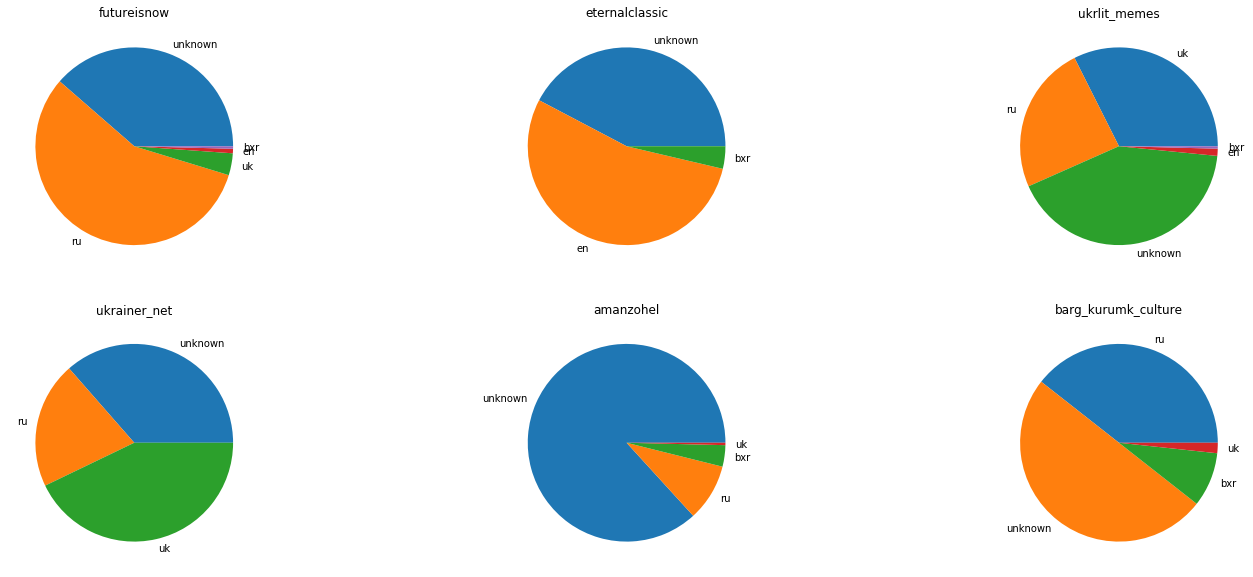

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))
for i in range(len(publics)):
    public = publics[i]
    vis(public, lang_detects_freqs[public], i // 3, i % 3)

Сделайте то же самое для определителя на символьных энграммах.

In [0]:
lang_detects_ngrams = {}
for public in publics:
    lang_detects_ngrams[public] = {}
    for i in corpora[public].keys():
        if corpora[public][i].values():
            res = clf.predict(corpora[public][i].values())
            for lang in res:
                add_to_dict(lang, lang_detects_ngrams[public])

In [0]:
lang_detects_ngrams

{'amanzohel': {'bxr': 221, 'ru': 36},
 'barg_kurumk_culture': {'bxr': 98, 'en': 1, 'ru': 136, 'uk': 1},
 'eternalclassic': {'bxr': 2, 'en': 818},
 'futureisnow': {'bxr': 51, 'en': 51, 'ru': 1121, 'uk': 5},
 'ukrainer_net': {'bxr': 13, 'en': 5, 'ru': 58, 'uk': 127},
 'ukrlit_memes': {'bxr': 13, 'en': 6, 'ru': 103, 'uk': 134}}

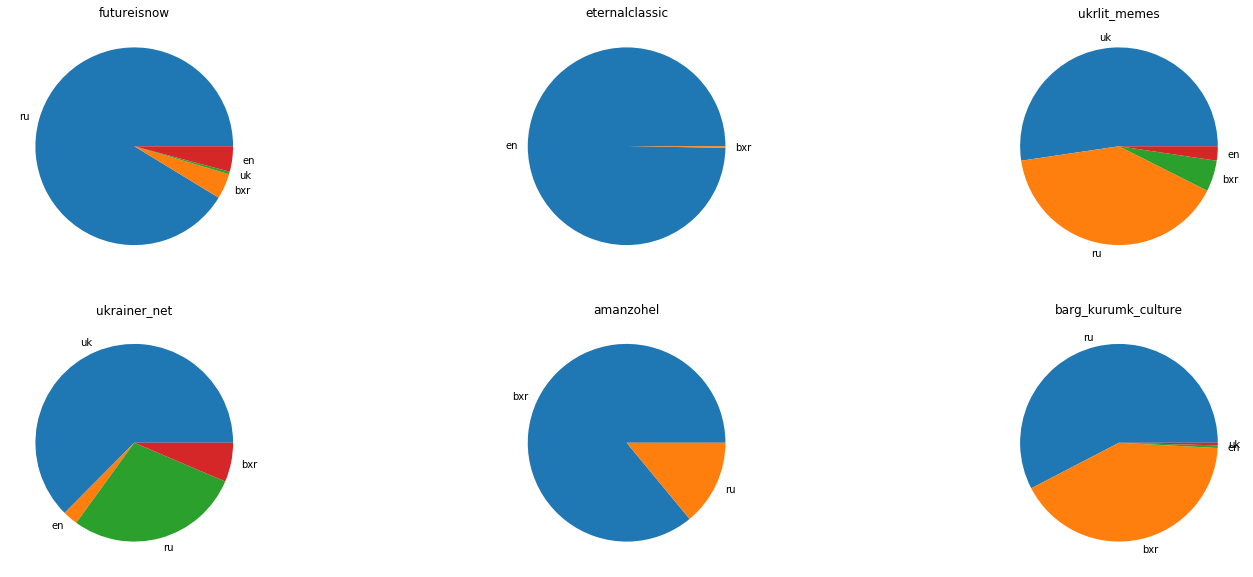

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))
for i in range(len(publics)):
    public = publics[i]
    vis(public, lang_detects_ngrams[public], i // 3, i % 3)

Обсудите работу каждого из классификаторов, обсудите ошибки, объясните разницу в результатах.

Из-за особенности работы определителя на частотах слов пришлось ввести отдельный тег для ситуаций, когда не распознавалось ни одно из слов текста (в ином случае мы бы относили текст комментария к первому в списке языку, что, очевидно, значительно повлияло бы на правильность результата). В итоге мы получили для некоторых пабликов значительную долю нераспознанных комментариев, из-за чего легко могла возникнуть проблема малого размера выборки. Одной из причин такого явления можно назвать то, что часто за пабликом закреплены какие-то специальные слова, которые пользователь регулярно пишут в комментарии. Такие слова могут быть далеко не частотными для обычных текстов, а потому в нашем словаре частот просто не окажется подобных слов.

Недолгого анализа пабликов достаточно, чтобы понять, что, в целом, определитель на частотах слов справился со своей задачей вполне прилично. Если отбросить вариант с unknown и смотреть только на оставшиеся доли, то получается следующее: в результате получились одинаковые доминирующие языки во всех пабликах, кроме amanzohel (и в этом случае поверхностный анализ паблика показывает, что прав всё-таки определитель на символьных энграммах). Кажется, что второй определитель всё же лучше справился с поставленной задачей, хотя на его работу могли повлиять похожие алфавиты языков. Тем не менее, в рамках данной задачи достаточно сложно судить о точности определителй, потому как мы не считали accuracy.